In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('Social_Network_Ads.csv')

In [22]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
data['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

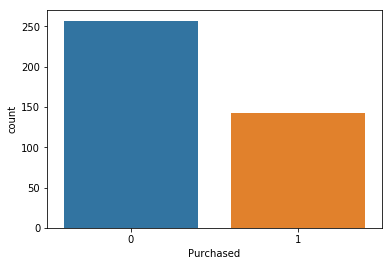

In [21]:
sns.countplot(data['Purchased'])

In [14]:
data['Age'].min()

18

In [16]:
data['Age'].max()

60

In [18]:
data['EstimatedSalary'].max()

150000

/home/ubuntu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


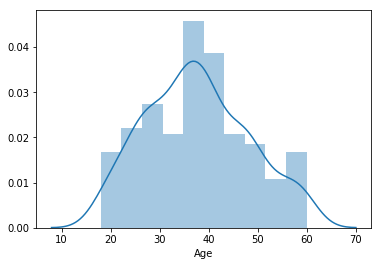

In [19]:
sns.distplot(data['Age'])

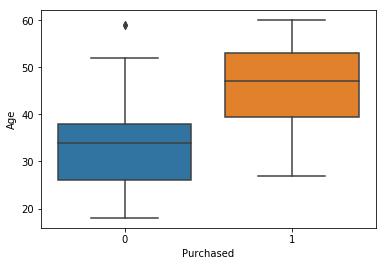

In [24]:
sns.boxplot(x='Purchased',y='Age',data=data)

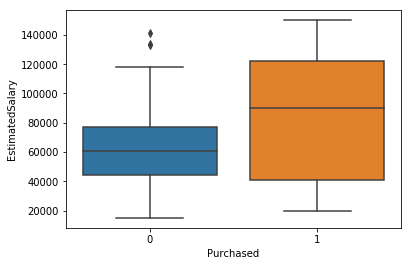

In [26]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [29]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [39]:
x=data[['Age','EstimatedSalary']]
y=data['Purchased']

In [41]:
print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [46]:
print(x_train.shape)
print(x_test.shape)

(300, 2)
(100, 2)


## model building

In [48]:
logit_model=LogisticRegression()

In [50]:
logit_model.fit(x_train,y_train)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
y_pred=logit_model.predict(x_test)

In [54]:
y_pred.shape

(100,)

## Evaluation

In [56]:
accuracy_score(y_test,y_pred)

0.66

In [58]:
precision_score(y_test,y_pred)


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [60]:
recall_score(y_test,y_pred)

0.0

In [62]:
f1_score(y_test,y_pred)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [64]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [73]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()

In [77]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Model after normalisation

In [79]:
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
y_pred.shape

(100,)

In [105]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
accuracy_score(y_pred,y_test)

0.79

In [86]:
precision_score(y_pred,y_test)

0.6176470588235294

In [88]:
recall_score(y_pred,y_test)

0.7241379310344828

In [90]:
f1_score(y_pred,y_test)

0.6666666666666667

In [92]:
confusion_matrix(y_pred,y_test)

array([[58, 13],
       [ 8, 21]])

In [96]:
y_pred_proba=logit_model.predict_proba(x_test)[:,1]

In [98]:
y_pred_proba.round(2)

array([0.25, 0.07, 0.18, 0.37, 0.99, 0.19, 0.44, 0.59, 0.78, 0.24, 0.01,
       0.01, 0.29, 0.  , 0.15, 0.51, 0.04, 0.58, 0.12, 0.02, 0.42, 0.48,
       0.93, 0.02, 0.99, 0.06, 0.96, 0.93, 0.  , 0.45, 0.64, 0.05, 0.98,
       0.08, 0.99, 0.64, 0.27, 0.27, 0.99, 0.99, 0.15, 0.04, 0.72, 0.04,
       0.01, 0.06, 0.26, 0.73, 0.45, 0.  , 0.56, 0.24, 0.22, 0.06, 0.35,
       0.34, 0.35, 0.02, 0.02, 0.99, 0.29, 0.42, 0.  , 0.06, 0.22, 0.41,
       0.02, 0.16, 0.78, 0.98, 0.45, 0.08, 0.94, 0.04, 0.  , 0.11, 0.01,
       0.15, 0.01, 0.2 , 0.29, 0.03, 0.98, 0.9 , 0.92, 0.3 , 0.  , 0.  ,
       0.52, 0.73, 0.9 , 0.79, 0.43, 0.08, 0.  , 0.34, 0.32, 0.33, 0.14,
       0.44])

In [100]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [102]:
y_pred_proba>0.5

array([False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
        True, False, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False])

In [104]:
(y_pred_proba>0.5).astype(int)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])